# Explore Data Science Academy

## 1. Importing libraries

In [1]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix
#import helper

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import  NearestNeighbors
import random
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.ensemble import RandomForestRegressor

## 2. Loading data

In [2]:
# loading our csv data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gtags= pd.read_csv('genome_tags.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb_data = pd.read_csv('imdb_data.csv')
df_tags =pd.read_csv('tags.csv')
df_link =pd.read_csv('links.csv')
df_score = pd.read_csv('genome_scores.csv')
df_sample = pd.read_csv('sample_submission.csv')

## 3. Exploratory data analysis

In [3]:
#looking at train dataset
df_train = df_train.sort_values('rating', ascending=False)
df_train

,userId,movieId,rating,timestamp
3933573,118176,593,5.0,1197630915
7585778,32810,4282,5.0,1111718329
7585749,66818,1096,5.0,931950762
1564921,148022,2064,5.0,945887531
1564920,144508,589,5.0,838570244
...,...,...,...,...
847378,115968,593,0.5,1569739117
6370061,160886,5463,0.5,1488859995
2353090,94354,6942,0.5,1089775727
8318356,116606,2424,0.5,1122948350


In [4]:
df_train['Id']=df_train['userId'].astype(str)+'_'+df_train['movieId'].astype(str)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 3933573 to 1367693
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   Id         object 
dtypes: float64(1), int64(3), object(1)
memory usage: 457.8+ MB


Text(0, 0.5, 'Number of Ratings')

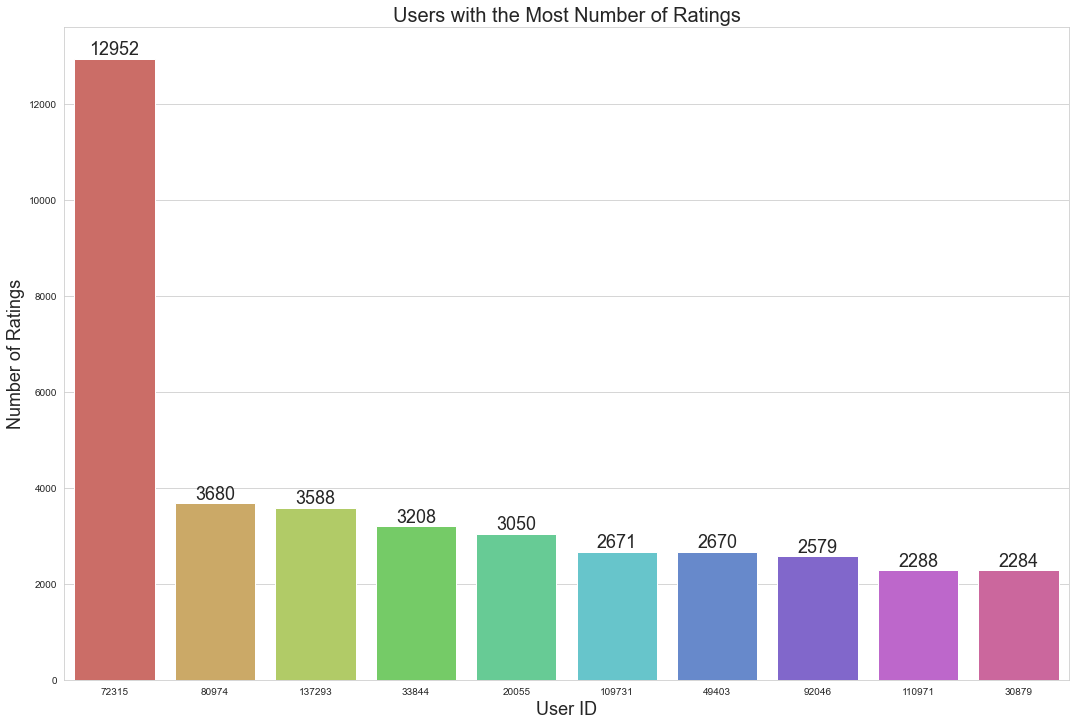

In [6]:
plt.figure(figsize=(18,12))
sns.set_style("whitegrid") 
data = df_train['userId'].value_counts(ascending=False).head(10)
fig = sns.barplot(x=data.index, y=data, order=data.index, palette='hls')
for i in fig.patches:
        fig.text(i.get_x() + i.get_width()/2, i.get_height(), '%d' % int(i.get_height()), fontsize=18, ha='center', va='bottom')
plt.title("Users with the Most Number of Ratings", size=20)
plt.xlabel("User ID", size=18)
plt.ylabel("Number of Ratings", size=18)

Text(0.5, 0, 'Rating')

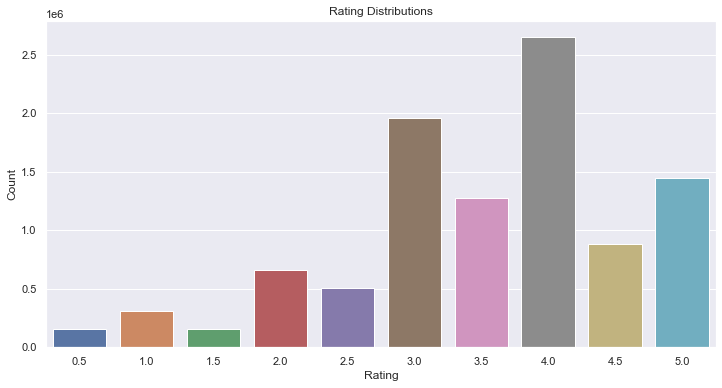

In [7]:
plt.figure (figsize= (12,6))
distribution = pd.DataFrame(list(df_train['rating'].value_counts()),
                                   index=[4, 3, 5, 3.5, 4.5, 2, 2.5, 1, 1.5, 0.5],
                                   columns=['Count'])
sns.set()
sns.color_palette("crest", as_cmap=True)
sns.barplot(x=distribution.index, y=distribution.Count)
plt.title('Rating Distributions')
plt.xlabel('Rating')

Another table that we will be making use of is the movies table , it contains sames rows as the one above but with 3 columns. The movies table contains the movieid , the genre and the title column. The genre column is very important because most users make use of the genre to search for movies not forgeting the title.

In [8]:
# checking the movies we have
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Below is the information of our movies dataset wich shows us the number of columns we have in this table with their data type , from the data we can see that two columns of table have object as their data type with 62423 entries.

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
df_movies['title']=df_movies['title'].astype(str)

In [11]:
df_movies["genres"] = df_movies["genres"].str.replace('|', ',', regex=True)
df_movies['year'] = df_movies['title'].str.extract(r"\((\d+)\)", expand=False)
df_movies.sample(3)

,movieId,title,genres,year
15812,83337,Mujhse Dosti Karoge! (2002),"Drama,Romance",2002
37439,152643,Dark Legacy II (2014),Documentary,2014
44533,168424,"Liar, Liar, Vampire (2015)",Comedy,2015


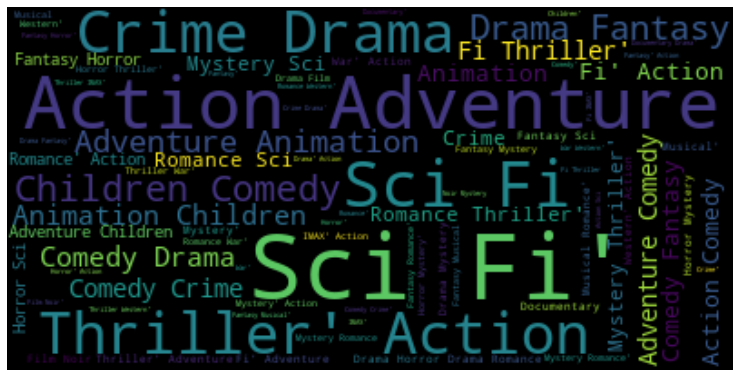

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = df_movies['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

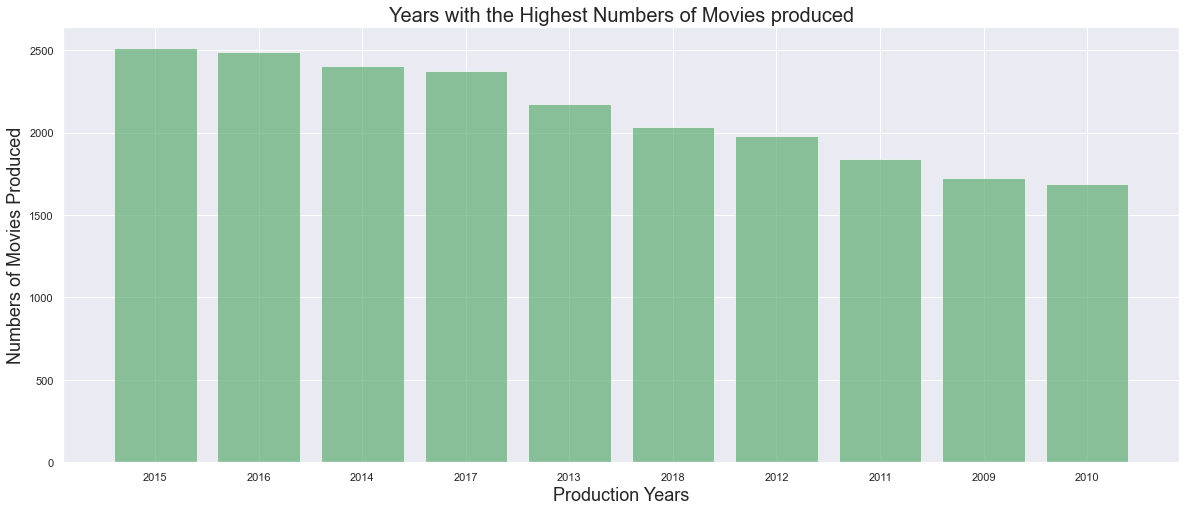

In [13]:
movies_year_count = df_movies["year"].value_counts()
fig, ax = plt.subplots( figsize=(20,8))

ax.bar(movies_year_count.index[:10], movies_year_count.values[:10],  facecolor='g', alpha=0.65)
ax.set_xlabel("Production Years", fontsize = 18)
ax.set_ylabel("Numbers of Movies Produced", fontsize = 18)
ax.set_title("Years with the Highest Numbers of Movies produced", fontsize = 20)
plt.show()

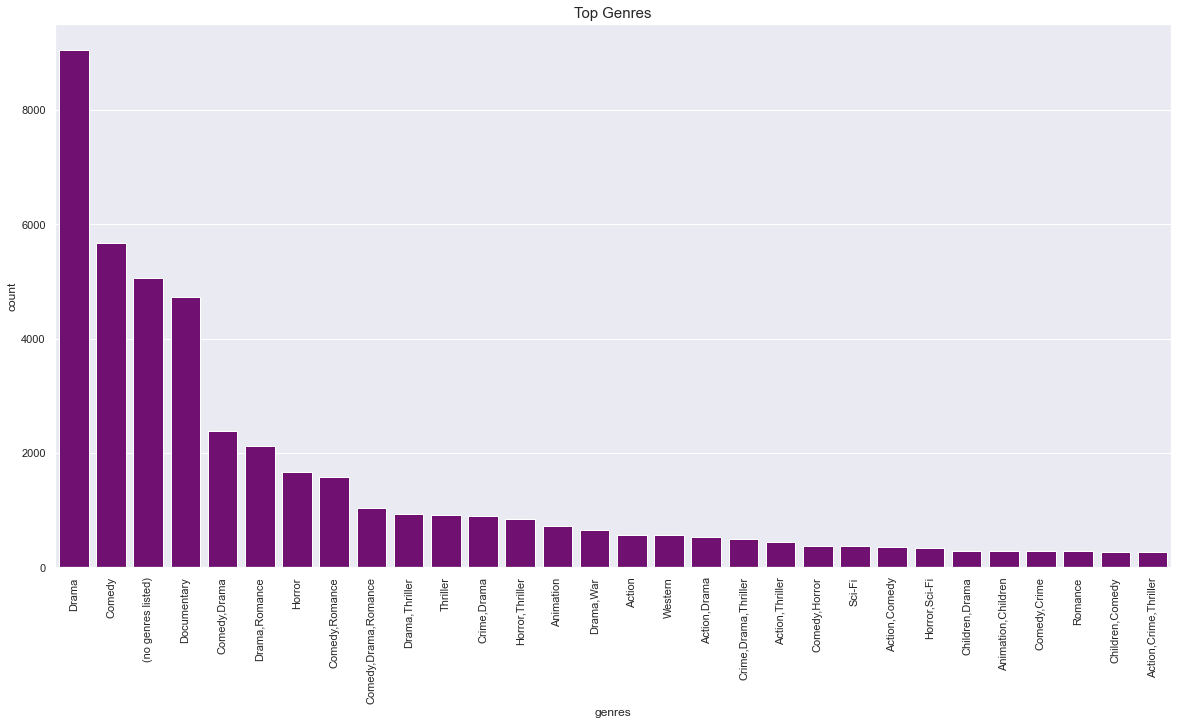

In [14]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = df_movies['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='purple')
ax.set_title('Top Genres', fontsize=15)
plt.xticks(rotation =90)
plt.style.use("dark_background")
plt.show()

In [15]:
# viewing the database
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [16]:
df_imdb_data["title_cast"] = df_imdb_data["title_cast"].str.replace('|', ',', regex=True)
df_imdb_data['plot_keywords'] = df_imdb_data['plot_keywords'].str.replace('|', ',', regex=True)
df_imdb_data.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,"$30,000,000","toy,rivalry,cowboy,cgi animation"
1,2,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Jonathan Hensleigh,104.0,"$65,000,000","board game,adventurer,fight,game"
2,3,"Walter Matthau,Jack Lemmon,Sophia Loren,Ann-Ma...",Mark Steven Johnson,101.0,"$25,000,000","boat,lake,neighbor,rivalry"


In [17]:
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [18]:
#searching for null values in our train data
df_train.isna().sum().sum()

0

In [19]:
# searching for null values in our movies data
df_movies.isna().sum().sum()

410

In [20]:
# filling the null values with 0
df_imdb_data.sum()

movieId    1.632738e+09
runtime    1.523644e+06
dtype: float64

In [21]:
# merging train table with the movies table for better view
train_movies = pd.merge( df_train, df_movies, on='movieId')
train_movies=train_movies.sort_values('userId', ascending=True)
train_movies

,userId,movieId,rating,timestamp,Id,title,genres,year
7332160,1,6370,4.5,1147869191,1_6370,"Spanish Apartment, The (L'auberge espagnole) (...","Comedy,Drama,Romance",2002
7656830,1,6954,3.5,1147869150,1_6954,"Barbarian Invasions, The (Les invasions barbar...","Comedy,Crime,Drama,Mystery,Romance",2003
8422356,1,27266,4.5,1147879365,1_27266,2046 (2004),"Drama,Fantasy,Romance,Sci-Fi",2004
4902074,1,27721,3.0,1147869115,1_27721,"Very Long Engagement, A (Un long dimanche de f...","Drama,Mystery,Romance,War",2004
8426994,1,7937,3.0,1147878055,1_7937,"Silence, The (Tystnaden) (1963)",Drama,1963
...,...,...,...,...,...,...,...,...
5217203,162541,2105,4.5,1240947373,162541_2105,Tron (1982),"Action,Adventure,Sci-Fi",1982
6917266,162541,344,0.5,1240949530,162541_344,Ace Ventura: Pet Detective (1994),Comedy,1994
955990,162541,2968,4.0,1240947487,162541_2968,Time Bandits (1981),"Adventure,Comedy,Fantasy,Sci-Fi",1981
3189789,162541,2396,4.0,1240952712,162541_2396,Shakespeare in Love (1998),"Comedy,Drama,Romance",1998


In [22]:
#del train_movies['userId']
#del train_movies['movieId']

In [23]:
train_movies.head(3)

,userId,movieId,rating,timestamp,Id,title,genres,year
7332160,1,6370,4.5,1147869191,1_6370,"Spanish Apartment, The (L'auberge espagnole) (...","Comedy,Drama,Romance",2002
7656830,1,6954,3.5,1147869150,1_6954,"Barbarian Invasions, The (Les invasions barbar...","Comedy,Crime,Drama,Mystery,Romance",2003
8422356,1,27266,4.5,1147879365,1_27266,2046 (2004),"Drama,Fantasy,Romance,Sci-Fi",2004


In [24]:
# viewing the train movies shape
train_movies.shape

(10000038, 8)

In [25]:
# looking at the data's statistics
train_movies.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [26]:
# looking at the correlation
train_movies.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.004270,0.002202,-0.001347
movieId,-0.004270,1.000000,-0.008940,0.520786
rating,0.002202,-0.008940,1.000000,0.010301
timestamp,-0.001347,0.520786,0.010301,1.000000


In [27]:
# confirming if there are no null values
train_movies.isna().sum().sum()

4752

In [28]:
# looking at our unique genres
train_movies['genres'].unique()

array(['Comedy,Drama,Romance', 'Comedy,Crime,Drama,Mystery,Romance',
       'Drama,Fantasy,Romance,Sci-Fi', ..., 'Action,Crime,Documentary',
       'Animation,Crime,Fantasy,Mystery,Sci-Fi',
       'Animation,Crime,Documentary,Drama'], dtype=object)

In [29]:
df_test

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


## 4. Data preprocessing

In [30]:
# droping the null values from the imdb table
df_imdb_data.dropna(inplace=True)
df_imdb_data.isna().sum()

movieId          0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64

In [31]:
df_test['Id'] = df_test['userId'].astype(str)+'_'+df_test['movieId'].astype(str)

In [32]:
# joining the two columns into one column Id
df_test

,userId,movieId,Id
0,1,2011,1_2011
1,1,4144,1_4144
2,1,5767,1_5767
3,1,6711,1_6711
4,1,7318,1_7318
...,...,...,...
5000014,162541,4079,162541_4079
5000015,162541,4467,162541_4467
5000016,162541,4980,162541_4980
5000017,162541,5689,162541_5689


In [33]:
del train_movies['Id']

In [34]:
movie_ratings = train_movies[['userId','movieId', 'rating', 'timestamp', 'title']]

In [35]:
movie_ratings.head(3)

,userId,movieId,rating,timestamp,title
7332160,1,6370,4.5,1147869191,"Spanish Apartment, The (L'auberge espagnole) (..."
7656830,1,6954,3.5,1147869150,"Barbarian Invasions, The (Les invasions barbar..."
8422356,1,27266,4.5,1147879365,2046 (2004)


In [36]:
print (f'Number of ratings in dataset: {movie_ratings.shape[0]}')

Number of ratings in dataset: 10000038


Average rating in dataset: 3.5333951730983424


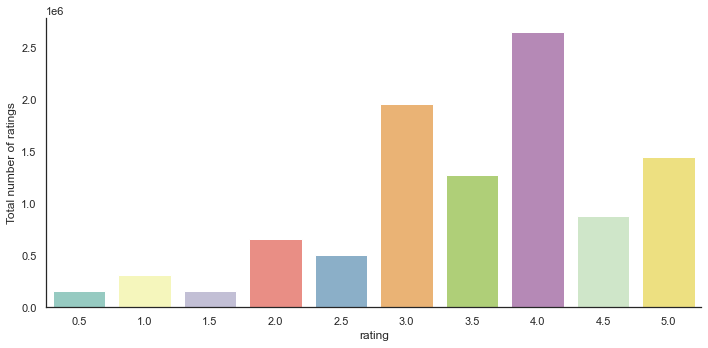

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=movie_ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(movie_ratings["rating"])}')

In [38]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",1995
1,2,Jumanji (1995),"Adventure,Children,Fantasy",1995
2,3,Grumpier Old Men (1995),"Comedy,Romance",1995
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance",1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),"Comedy,Drama",2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [39]:
# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = df_movies['title']
indices = pd.Series(df_movies.index, index=df_movies['title'])

In [40]:
imdb_movies= pd.merge(df_movies, df_imdb_data , on='movieId')

In [41]:
imdb_movies.head(3)

,movieId,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",1995,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,"$30,000,000","toy,rivalry,cowboy,cgi animation"
1,2,Jumanji (1995),"Adventure,Children,Fantasy",1995,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Jonathan Hensleigh,104.0,"$65,000,000","board game,adventurer,fight,game"
2,3,Grumpier Old Men (1995),"Comedy,Romance",1995,"Walter Matthau,Jack Lemmon,Sophia Loren,Ann-Ma...",Mark Steven Johnson,101.0,"$25,000,000","boat,lake,neighbor,rivalry"


In [42]:
imdb_movies['director_key'] = (pd.Series(imdb_movies[['director', 'plot_keywords']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = imdb_movies['title']
indices = pd.Series(imdb_movies.index, index=imdb_movies['title'])

In [43]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_directorKey_matrix = tf.fit_transform(imdb_movies['director_key'])

In [44]:
cosine_sim_directorKey = cosine_similarity(tf_directorKey_matrix,
                                        tf_directorKey_matrix)
print (cosine_sim_directorKey.shape)

(6493, 6493)


In [45]:
cosine_sim_directorKey[:5]

array([[1.        , 0.        , 0.06336834, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06336834, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 5. Model deployment

### Content base filtering

In [46]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    m_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_directorKey[m_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [47]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

4447                          Toy Story 3 (2010)
1123                          Toy Story 2 (1999)
5596                               Planes (2013)
3757                         Space Chimps (2008)
6485                  Ronal the Barbarian (2011)
3282                 Happily N'Ever After (2007)
3484    Tekkonkinkreet (Tekkon kinkurîto) (2006)
4210                    Fantastic Mr. Fox (2009)
4673                     Cowboys & Aliens (2011)
Name: title, dtype: object

In [48]:
content_generate_top_N_recommendations("Ace Ventura: Pet Detective (1994)", N=10)

1730                        White Fang (1991)
2158                         Good Boy! (2003)
16      Ace Ventura: When Nature Calls (1995)
4987         12 Dogs of Christmas, The (2005)
3884           Beverly Hills Chihuahua (2008)
4212                           Top Dog (1995)
3432                 A Dog's Breakfast (2007)
5879                             Rio 2 (2014)
2134                   Beethoven's 2nd (1993)
Name: title, dtype: object

In [49]:
content_generate_top_N_recommendations("Grumpier Old Men (1995)", N=10)

2709                                    Elektra (2005)
891                                  Jack Frost (1998)
3313                                Ghost Rider (2007)
52                                    Big Bully (1996)
829                                 Simon Birch (1998)
1958                                  Daredevil (2003)
5715         Christmas Party, The (Joulubileet) (1996)
1771    Crocodile Hunter: Collision Course, The (2002)
1569                     Two Can Play That Game (2001)
Name: title, dtype: object

In [50]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    m_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 

    # Gather the similarity ratings between each movie the user has rated
    # and the reference movie 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_directorKey[m_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [51]:
# Subset of ratings from user 314
movie_ratings[movie_ratings['userId'] == 314][1:10]

,userId,movieId,rating,timestamp,title
6213738,314,383,4.0,843576295,Wyatt Earp (1994)
7952906,314,252,4.0,843573423,I.Q. (1994)
5541843,314,515,3.0,843574119,"Remains of the Day, The (1993)"
6139386,314,552,3.0,843575928,"Three Musketeers, The (1993)"
1417860,314,457,5.0,843572769,"Fugitive, The (1993)"
3060312,314,780,3.0,843573735,Independence Day (a.k.a. ID4) (1996)
3897860,314,454,4.0,843572913,"Firm, The (1993)"
5359985,314,153,4.0,843572732,Batman Forever (1995)
7228898,314,168,4.0,843573572,First Knight (1995)


In [52]:
#title = "Remains of the Day, The (1993)"
#actual_rating = movie_ratings[(movie_ratings['userId'] == 314) & (movie_ratings['title'] == title)]['rating'].values[:]
#pred_rating = content_generate_rating_estimate(movie_title=title, user=314, rating_data=movie_ratings)
#print (f"Title - {title}")
#print ("---")
#print (f"Actual rating: \t\t {actual_rating}")
#print (f"Predicted rating: \t {pred_rating}")

### Collaborative base filtering

In [56]:
movie_rate=movie_ratings[['rating', 'userId', 'movieId', 'timestamp']]

In [57]:
# Scaling the movies_df
# declare the features to be all columns from our movies_df
features = [col for col in movie_rate.columns]

# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
scaled_df = pd.read_csv('train.csv')
scaled_df[features] = preprocessing.scale(scaled_df[features])

Text(0, 0.5, 'Cumulative explained variance')

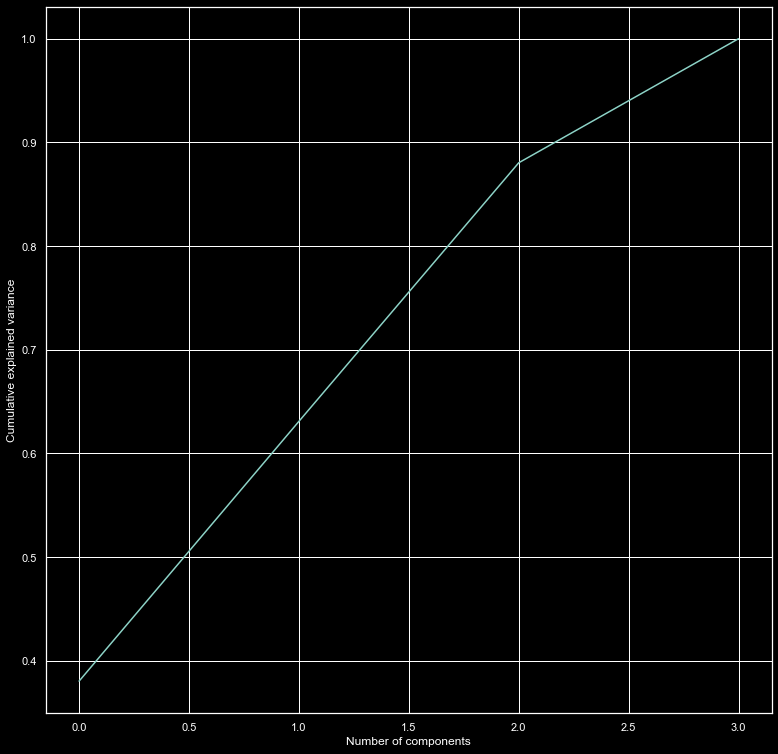

In [58]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(scaled_df[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)



# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:
pca_85 = PCA(.85)
pca_85.fit_transform(scaled_df[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 3 components.


In [60]:
pca.explained_variance_ratio_[:3]

array([0.3802045 , 0.25060905, 0.24947369])

In [61]:
# exclude non-features from data
reg_data = scaled_df[features]

# set aside response variable (Unscaled!)
reg_response = movie_rate["rating"]

# drop response variable
reg_data = reg_data.drop(['rating'], 1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(reg_data, reg_response, test_size=0.2)

In [63]:
# create PCA object with n_components set to 2
pca_reg = PCA(n_components=2)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

2

In [64]:
pca_reg.explained_variance_ratio_.sum()

0.8402548965054927

In [65]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results for smaller movie dataset
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9342  0.9413  0.9363  0.9320  0.9401  0.9368  0.0035  
MAE (testset)     0.7349  0.7433  0.7384  0.7337  0.7414  0.7383  0.0037  
Fit time          3.76    3.69    3.70    6.36    3.81    4.27    1.05    
Test time         0.18    0.11    1.59    0.12    0.12    0.42    0.58    


{'test_rmse': array([0.93423617, 0.94126997, 0.93633294, 0.93200887, 0.94006732]),
 'test_mae': array([0.73491078, 0.74325548, 0.73835885, 0.73365918, 0.74135701]),
 'fit_time': (3.7592215538024902,
  3.6940886974334717,
  3.7023775577545166,
  6.363295316696167,
  3.808736562728882),
 'test_time': (0.18114495277404785,
  0.10691618919372559,
  1.5910625457763672,
  0.12048721313476562,
  0.12001204490661621)}

In [66]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

#our training data
df = pd.DataFrame(movie_rate)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(movie_rate[['userId', 'movieId', 'rating']], reader)

In [67]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [68]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8375


0.837537352039775

In [69]:
df_test.loc[:, 'rating'] = 0
df_test.head()

,userId,movieId,Id,rating
0,1,2011,1_2011,0
1,1,4144,1_4144,0
2,1,5767,1_5767,0
3,1,6711,1_6711,0
4,1,7318,1_7318,0


In [70]:
#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(df_test[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algo.test(test)